## Introduction

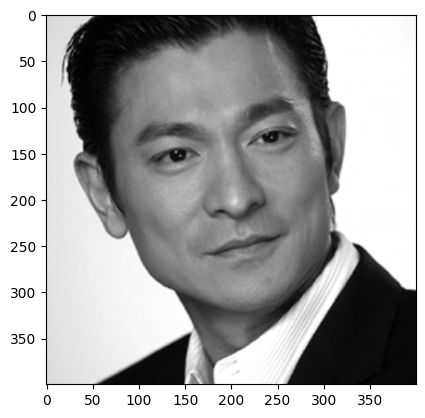

In [1]:
thresh = 127 / 255.0
import matplotlib.pyplot as plt
from skimage import io
andy = io.imread('andy.jpg', as_gray = True)
plt.imshow(andy, cmap = 'gray')
plt.show()

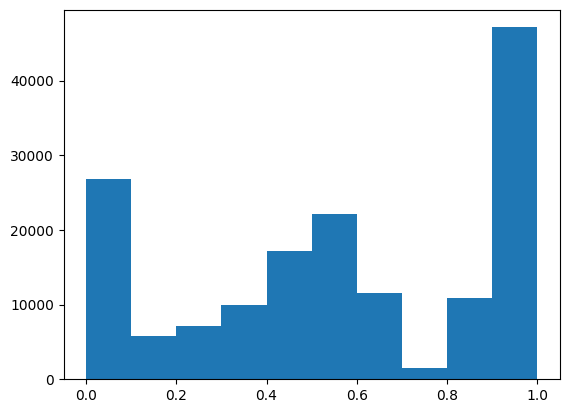

thresh


In [2]:
plt.hist(andy.ravel())
plt.show()
print('thresh')

In [3]:
int(True) # == 255 -> white
int(False) # == 0 -> black

0

In [4]:
andy[:9]

array([[0.83529412, 0.83529412, 0.83921569, ..., 0.96078431, 0.96078431,
        0.95686275],
       [0.83529412, 0.83921569, 0.83921569, ..., 0.96078431, 0.96078431,
        0.95686275],
       [0.83921569, 0.83921569, 0.83921569, ..., 0.96078431, 0.96078431,
        0.96078431],
       ...,
       [0.84705882, 0.84705882, 0.84313725, ..., 0.96470588, 0.96078431,
        0.96078431],
       [0.85098039, 0.84705882, 0.84313725, ..., 0.96470588, 0.96470588,
        0.96078431],
       [0.83921569, 0.84313725, 0.84313725, ..., 0.96862745, 0.96862745,
        0.96470588]])

In [5]:
binary = (andy > thresh)
binary

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

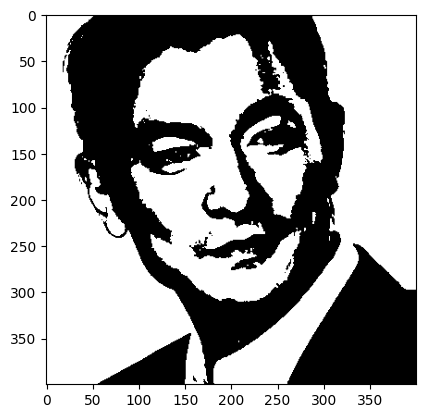

In [6]:
plt.imshow(binary, cmap = 'gray')
plt.show()

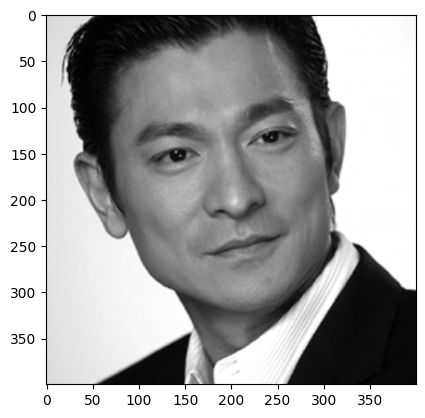

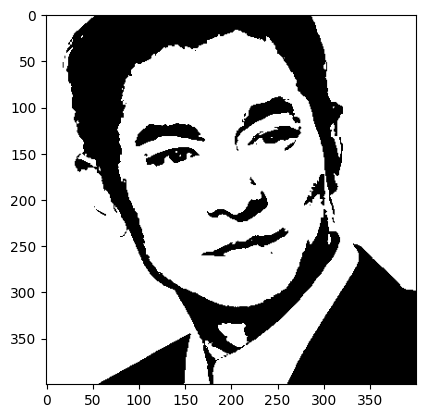

In [31]:
import matplotlib.pyplot as plt
from skimage import color
andy = color.rgb2gray(plt.imread('andy.jpg')) * 255.0
# andy = plt.imread
plt.imshow(andy, cmap = 'gray')
plt.show()

thresh = 100
thresh_image = andy > thresh
plt.imshow(thresh_image, cmap = 'gray')
plt.show()

### try_all_threshold

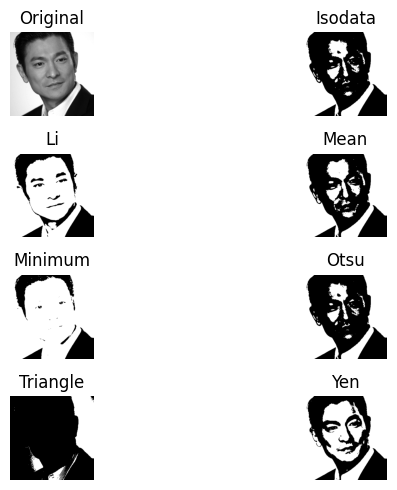

In [32]:
from skimage.filters import try_all_threshold
fg, ex = try_all_threshold(andy, verbose = False)

### threshold_local

(400, 400)


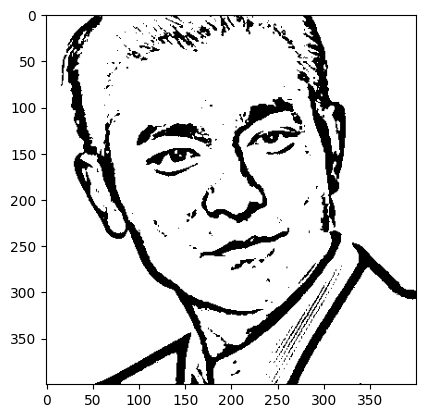

In [33]:
from skimage.filters import threshold_local
local_value = threshold_local(image = andy, block_size = 35, offset = 9)
print(local_value.shape)
local_andy = andy > local_value
plt.imshow(local_andy, cmap = 'gray')
plt.show()

### threshold_otsu

153.896484375


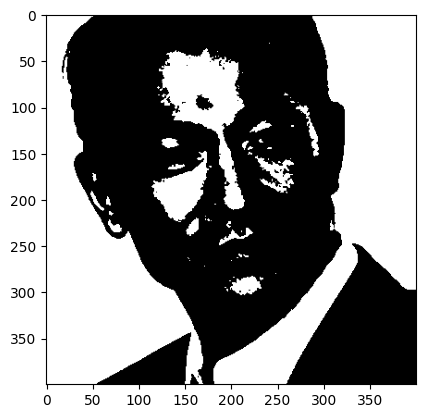

In [36]:
from skimage.filters import threshold_otsu
otsu_value = threshold_otsu(andy)
print(otsu_value)
otsu_andy = andy > otsu_value
plt.imshow(otsu_andy, cmap = 'gray')
plt.show()

* rgb2gray -> RGB to grayscale : converts an image with RGB channels into an image with a single grayscale channel

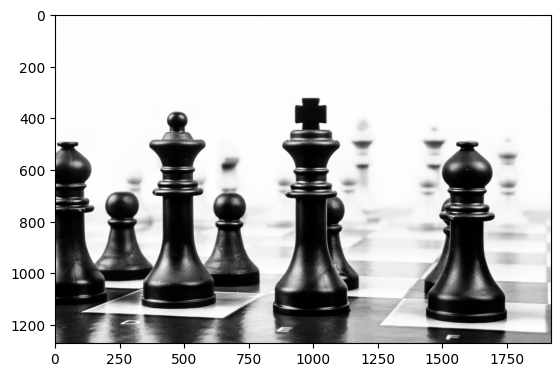

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray

def show_image(image, title = 'Image', cmap_type = 'gray'):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
chess_pieces_image = plt.imread('chess_pieces_image.jpg')
plt.imshow(chess_pieces_image)
plt.show()

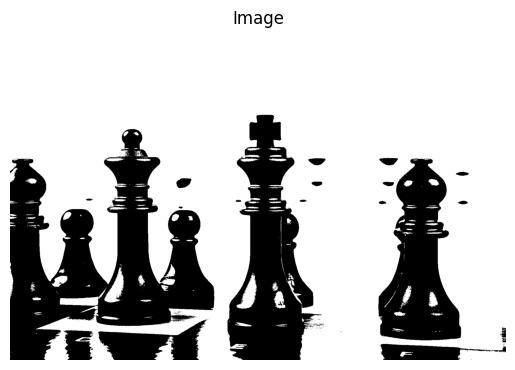

In [52]:
# Import the "otsu threshold" function
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

show_image(binary, title = 'Image', cmap_type = 'gray')

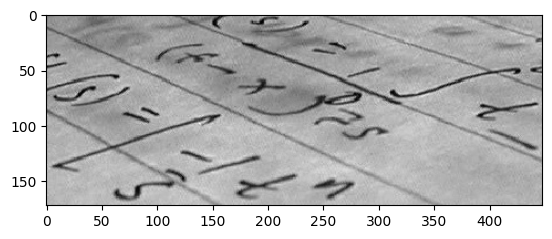

In [54]:
# Practice
page_image = rgb2gray(plt.imread('page_image.jpg')) * 255 # <- 須留意，否則local會出問題
plt.imshow(page_image, cmap = 'gray')
plt.show()

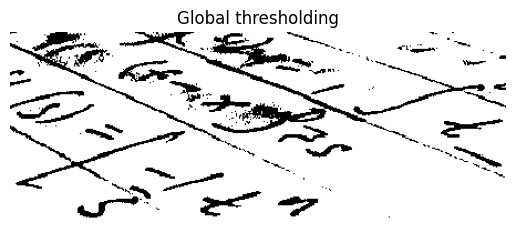

In [56]:
# Import the "otsu threshold" function
from skimage.filters import threshold_otsu

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# show the binary image obtained
show_image(binary_global, 'Global thresholding')

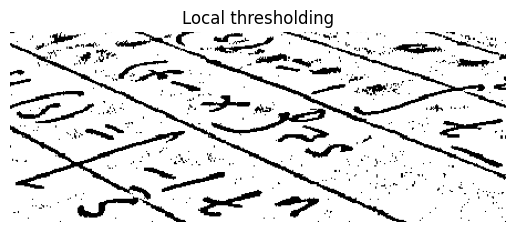

In [57]:
# Import the "local threshold" function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset = 10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

In [58]:
# Practice
fruits_image = plt.imread('fruits-2.jpg')

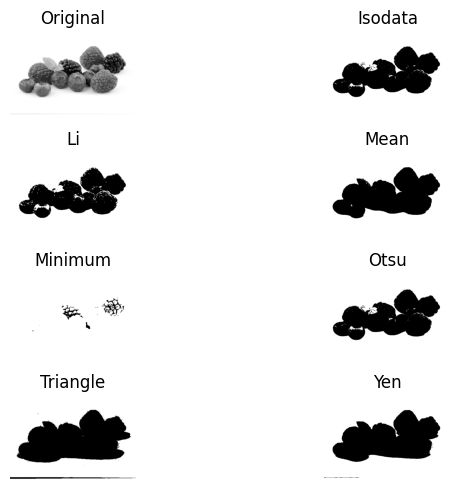

In [60]:
# Import the "try all" function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function
from skimage.color import rgb2gray

# Turn the fruits image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the grayscale image
fig, ax = try_all_threshold(grayscale, verbose = False)

# Show the resulting plots
plt.show()

In [61]:
# Practice
tools_image = plt.imread('tools_image.jpg')

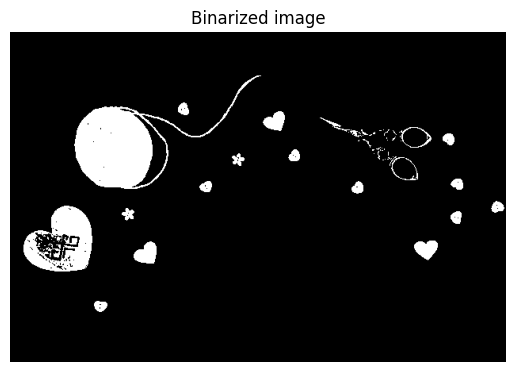

In [62]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(tools_image)

# Obtain the binary image by applying thresholding
binary_image = tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

## Thresholding_Local-MNIST Dataset

In [8]:
# from keras.models import sequential
from keras.datasets import mnist

# 載入Mnist資料庫的訓練資料，並自動分為「訓練組」、「測試組」

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

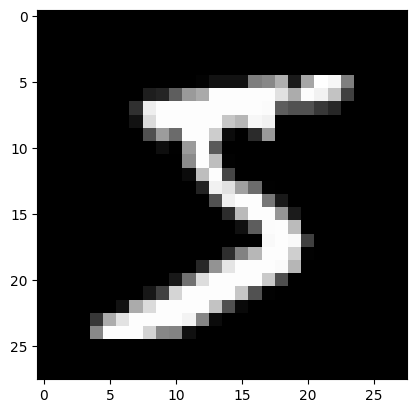

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28, 28), cmap = 'gray')
plt.show()

(28, 28)


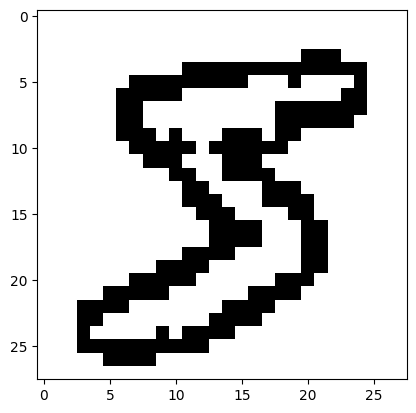

In [13]:
# filters.threshold_local(
#                   image,
#                   block_size,
#                   method = 'gaussian',
#                   offset = 0,
#                   mode = 'reflect',
#                   param = None,
#                   cval = 0)

from skimage import filters
local_thresh = filters.threshold_local(image = X_train[0].reshape(28, 28),
                                       block_size = 5,
                                       offset = 1)
print(local_thresh.shape)
binary = X_train[0].reshape(28, 28) > local_thresh
plt.imshow(binary, cmap = 'gray')
plt.show()

## Thresholding_Try all threshold-MNIST Dataset

In [14]:
# from keras.models import sequential
from keras.datasets import mnist

# 載入Mnist資料庫的訓練資料，並自動分為「訓練組」、「測試組」

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
X_train.shape

(60000, 28, 28)

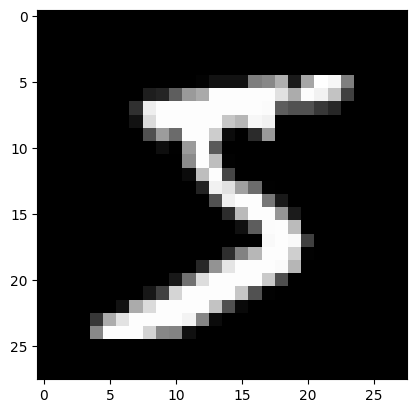

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28,28), cmap = 'gray')
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


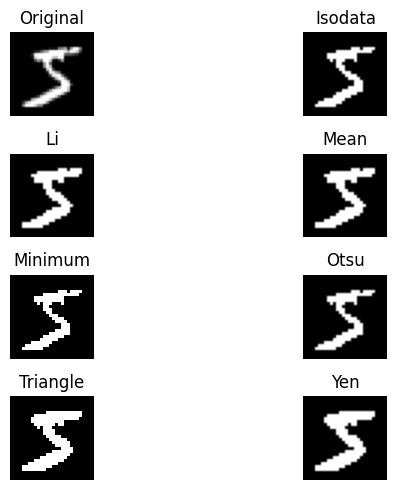

In [17]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(X_train[0].reshape(28, 28))

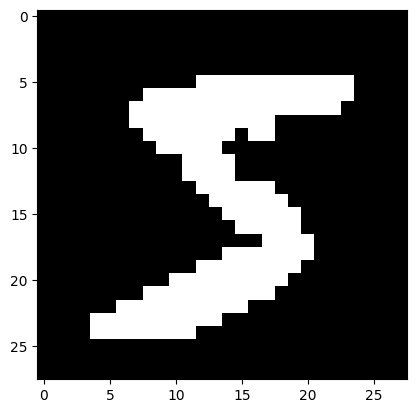

In [20]:
from skimage.filters import thresholding
thresh = thresholding.threshold_yen(X_train[0].reshape(28, 28))
binary = X_train[0].reshape(28, 28) > thresh
plt.imshow(binary, cmap = 'gray')
plt.show()

In [ ]:
# 批次處理，將數據直接轉換成黑白對比

In [21]:
binaries = X_train > 127

In [22]:
binaries.shape

(60000, 28, 28)

In [24]:
binaries[0].shape

(28, 28)

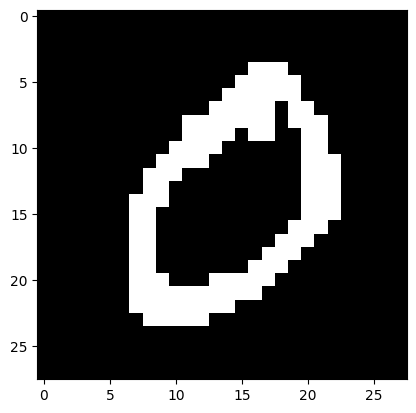

In [26]:
plt.imshow(binaries[1], cmap = 'gray')
plt.show()

In [27]:
# how to process 60000 peices of data to use?

from tqdm import tqdm
from skimage.filters import thresholding
# thresh = thresholding.threshold_yen
X_train_yen = []
for i in tqdm(range(X_train.shape[0])):
    thresh = thresholding.threshold_yen(X_train[i].reshape(28, 28))
    binary = X_train[i].reshape(28, 28) > thresh
    X_train_yen.append(binary)

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:10<00:00, 5640.60it/s]


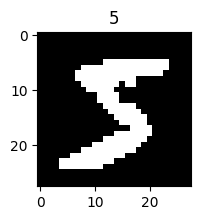

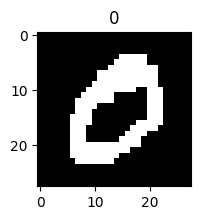

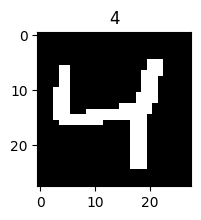

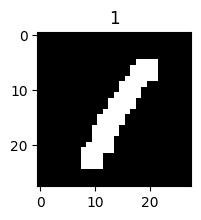

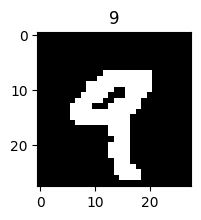

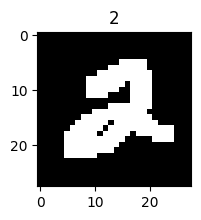

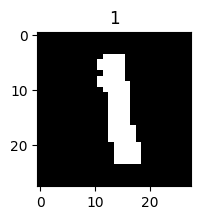

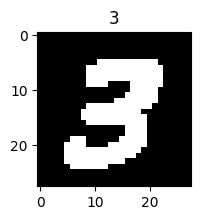

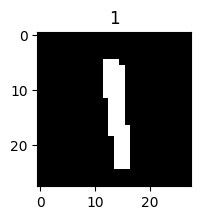

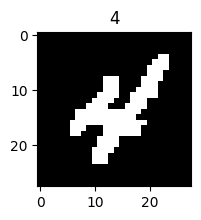

In [29]:
# 已經完成數據的增強影像處理
for i in range(10):
    plt.figure(figsize = (2, 2))
    plt.title(y_train[i])
    plt.imshow(X_train_yen[i], cmap = 'gray')
    plt.show()

## Thresholding_Precdict MNIST Dataset

In [1]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將label標籤轉為one-hot-encoding  
from matplotlib import pyplot as plt
from datetime import datetime

In [ ]:
# skimage.filters.thresholding.threshold_isodata
# skimage.filters.thresholding.threshold_li
# skimage.filters.thresholding.threshold_mean
# skimage.filters.thresholding.threshold_minimum
# skimage.filters.thresholding.threshold_otsu     <--
# skimage.filters.thresholding.threshold_triangle
# skimage.filters.thresholding.threshold_yen
# skimage.filters.thresholding.threshold_local    <--

######### Local
# filters.threshold_local(image,
#                         block_size,
#                         method = 'gaussian',
#                         offset = 0,
#                         mode = 'reflect',
#                         param = None,
#                         cval = 0)
# from skimage import filters
# local_thresh = filters.threshold_local(image = X_train[0].reshape(28, 28),
#                                        block_size = 5,
#                                        offset = 1)
# print(local_thresh.shape)
# binary = X_train[0].reshape(28, 28) > local_thresh
# plt.imshow(binary, cmap = 'gray')
# plt.show()

######### Global
# from skimage.filters import threshold_otsu
# otsu_value = threshold_otsu(andy)
# print(otsu_value)
# otus_andy = andy > otsu_value
# plt.imshow(otus_andy, cmap = 'gray')
# plt.show()

In [ ]:
# 參考單筆數據進行thresholding
# import matplotlib.pyplot as plt
# plt.imshow(X_train[0].reshape(28, 28), cmap = 'gray')
# plt.show()
# binary = X_train[0].reshape(28, 28) > (100) # <--可以參考以上可能方式讓模型更精準
# plt.imshow(binary, cmap = 'gray')
# plt.show()

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10337.67it/s]


(60000, 28, 28) (10000, 28, 28)


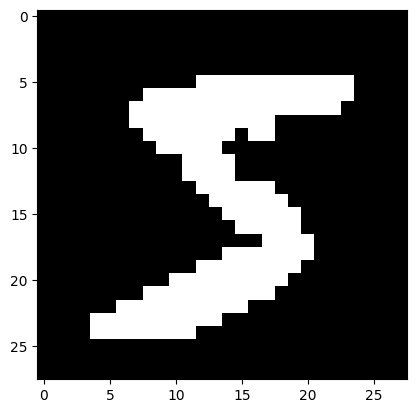

In [2]:
# 重新載入資料
# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 首次處理針對X_train, X_test
X_train_binary, X_test_binary = [], []
from skimage.filters import thresholding # threshold_otsu
from tqdm import tqdm
for i in tqdm(range(X_train.shape[0])):
    thresh = thresholding.threshold_yen(X_train[i]) # block_size = 5
    binary = X_train[i] > thresh
    X_train_binary.append(binary)

for i in tqdm(range(X_test.shape[0])):
    thresh = thresholding.threshold_otsu(X_test[i])
    binary = X_test[i] > thresh
    X_test_binary.append(binary)

# 數據二次處理
X_train, X_test = np.array(X_train_binary), np.array(X_test_binary)
print(X_train.shape, X_test.shape)
# 顯示
plt.imshow(X_train[0], cmap = 'gray')

In [3]:
# 建立簡單的線性執行模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 128, input_dim = 784, kernel_initializer = 'normal', activation = 'relu')) 
# Add output layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 將training的label進行one-hot encoding，例如數字7經過One-hot encoding轉換後是0000001000，即第7個值為1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將training的input資料轉為二維
X_train_2D = X_train.reshape(60000, 28 * 28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28 * 28).astype('float32')  

x_Train_norm = X_train_2D / 255.0
x_Test_norm = X_test_2D / 255.0

# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot,
                          validation_split = 0.2, epochs = 10,
                          batch_size = 800, verbose = 2)

Epoch 1/10
60/60 - 2s - loss: 2.2830 - accuracy: 0.3210 - val_loss: 2.2463 - val_accuracy: 0.3930 - 2s/epoch - 25ms/step
Epoch 2/10
60/60 - 0s - loss: 2.1707 - accuracy: 0.4749 - val_loss: 2.0666 - val_accuracy: 0.5062 - 362ms/epoch - 6ms/step
Epoch 3/10
60/60 - 1s - loss: 1.9438 - accuracy: 0.5512 - val_loss: 1.7957 - val_accuracy: 0.6288 - 660ms/epoch - 11ms/step
Epoch 4/10
60/60 - 0s - loss: 1.6713 - accuracy: 0.6435 - val_loss: 1.5227 - val_accuracy: 0.6734 - 333ms/epoch - 6ms/step
Epoch 5/10
60/60 - 1s - loss: 1.4252 - accuracy: 0.6858 - val_loss: 1.2969 - val_accuracy: 0.7237 - 521ms/epoch - 9ms/step
Epoch 6/10
60/60 - 0s - loss: 1.2295 - accuracy: 0.7324 - val_loss: 1.1209 - val_accuracy: 0.7710 - 439ms/epoch - 7ms/step
Epoch 7/10
60/60 - 0s - loss: 1.0781 - accuracy: 0.7629 - val_loss: 0.9851 - val_accuracy: 0.7940 - 438ms/epoch - 7ms/step
Epoch 8/10
60/60 - 1s - loss: 0.9591 - accuracy: 0.7846 - val_loss: 0.8771 - val_accuracy: 0.8126 - 518ms/epoch - 9ms/step
Epoch 9/10
60/60 

In [5]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.8570 - accuracy: 0.8005

	[Info] Accuracy of testing data = 80.0%


In [6]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)
print()
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7452 - accuracy: 0.8265

	[Info] Accuracy of training data = 82.7%


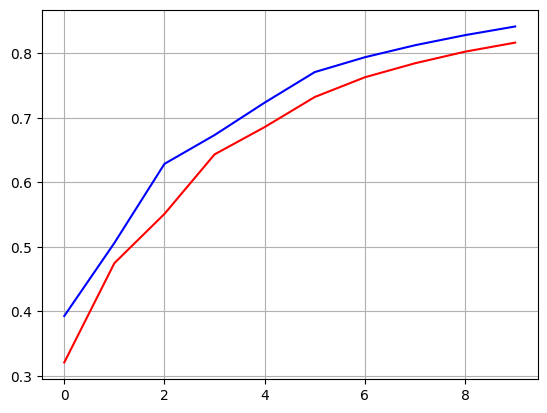

In [7]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

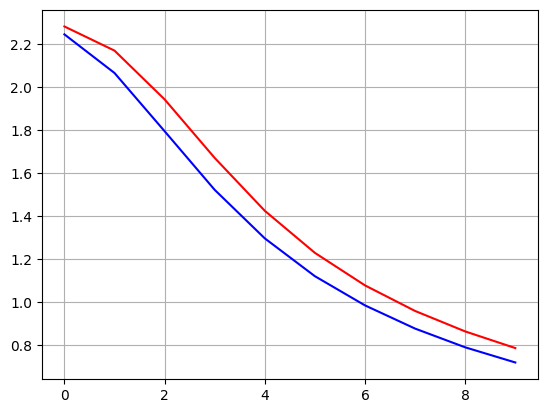

In [8]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

## Thresholding_Malaria data

In [1]:
file = './train/00000.jpg'
import matplotlib.pyplot as plt
img = plt.imread(fname = file)
img.shape

(128, 128, 3)

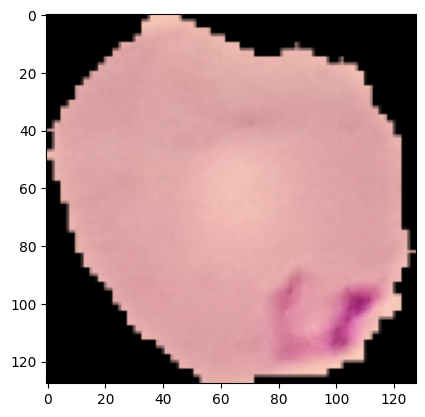

(0.0, 1.0)

In [2]:
# read image
plt.imshow(img)
plt.show()
img.min(), img.max()

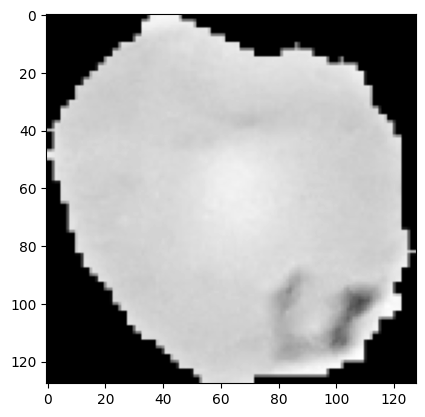

(128, 128)

In [3]:
# convert grayscale
from skimage import color
img_gray = color.rgb2gray(img)
plt.imshow(img_gray, cmap = 'gray')
plt.show()
img_gray.shape

In [4]:
# 扁平化
img_flatten = img_gray.ravel()
print(img_flatten.shape)
img_flatten.max()

(16384,)


0.8425086

In [5]:
# 將所有檔案名稱讀取
path = './train'
Xfiles = []
import os
for root, dirs, files in os.walk(path):
    for f in files:
        Xfiles.append(root + '/' + f)

In [6]:
# X數據數量
Xfiles[:3], len(Xfiles)

(['./train/00000.jpg', './train/00001.jpg', './train/00002.jpg'], 21765)

In [7]:
# y數據
import pandas as pd
yfiles = pd.read_csv('./train_labels.csv')
yfiles[:3]

,filename,infected
0,00000.jpg,1
1,00001.jpg,1
2,00002.jpg,1


In [9]:
# 如何定位02791.jpg 
yfiles[yfiles.filename == '02791.jpg']['infected'].values[0]

1

In [ ]:
# X, y --> X_train , y_train
# 21765 --> 每次讀取一筆 --> 轉灰階 --> X_train
# train_labels.csv --> 被對應上面的影像名稱 --> one-hot --> y_train

In [ ]:
# X_train.shape = 21765, 128, 128, 1單色階
# y_train.shape = 21765, 2

In [10]:
# X, y
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage import color
X, y = [], []
for x in tqdm(Xfiles[:]):
    img = color.rgb2gray(plt.imread(x))
    X.append(img)
    y.append(yfiles[yfiles.filename == x.split('/')[-1]]['infected'].values[0])
    # print(x, img.shape, x.split('/')[-1], \ yfiles[yfiles.filename==x.split('/')[-1]]['infected'].values[0])

100%|████████████████████████████████████████████████████████████████████████████| 21765/21765 [06:15<00:00, 57.92it/s]


In [11]:
# 轉換X, y
import numpy as np
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((21765, 128, 128), (21765,))

In [12]:
# 此處需要區分出train , test數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17412, 128, 128), (4353, 128, 128), (17412,), (4353,))

In [13]:
# 套入Keras.API -- tensorflow
# 導入函式庫
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [14]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 256, input_dim = 128 * 128, 
                kernel_initializer = 'normal', activation = 'relu'))               # input + hidder layer
model.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu'))  # hidder layer
model.add(Dense(units = 64, kernel_initializer = 'normal', activation = 'relu'))   # hidder layer
model.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'softmax')) # Add output layer

# 選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4194560   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,235,842
Trainable params: 4,235,842
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 將training的label進行one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train)
# 將training的input資料轉為二維
X_train_2D = X_train.reshape(X_train.shape[0], 128 * 128).astype('float32')  # 可自行嘗試float64
X_train_norm = X_train_2D  # 將訊號0~255轉換成0~1.0

In [16]:
# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = X_train_norm, 
                          y = y_TrainOneHot, 
                          validation_split = 0.2, 
                          epochs = 50, 
                          batch_size = 800, 
                          verbose = 2) # 0 1 2
print('Done!!')

Epoch 1/50
18/18 - 5s - loss: 0.7273 - accuracy: 0.5061 - val_loss: 0.7076 - val_accuracy: 0.4907 - 5s/epoch - 290ms/step
Epoch 2/50
18/18 - 4s - loss: 0.6869 - accuracy: 0.5385 - val_loss: 0.6746 - val_accuracy: 0.5719 - 4s/epoch - 201ms/step
Epoch 3/50
18/18 - 4s - loss: 0.6775 - accuracy: 0.5637 - val_loss: 0.6688 - val_accuracy: 0.5817 - 4s/epoch - 200ms/step
Epoch 4/50
18/18 - 4s - loss: 0.6742 - accuracy: 0.5748 - val_loss: 0.6643 - val_accuracy: 0.5828 - 4s/epoch - 210ms/step
Epoch 5/50
18/18 - 4s - loss: 0.6718 - accuracy: 0.5761 - val_loss: 0.6642 - val_accuracy: 0.5650 - 4s/epoch - 198ms/step
Epoch 6/50
18/18 - 4s - loss: 0.6680 - accuracy: 0.5878 - val_loss: 0.6678 - val_accuracy: 0.5527 - 4s/epoch - 201ms/step
Epoch 7/50
18/18 - 4s - loss: 0.6652 - accuracy: 0.5829 - val_loss: 0.6712 - val_accuracy: 0.5969 - 4s/epoch - 197ms/step
Epoch 8/50
18/18 - 4s - loss: 0.6589 - accuracy: 0.6006 - val_loss: 0.6504 - val_accuracy: 0.6115 - 4s/epoch - 204ms/step
Epoch 9/50
18/18 - 3s - 

In [17]:
# 顯示訓練成果(分數)
scores = model.evaluate(X_train_norm, y_TrainOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

545/545 [==============================] - 5s 10ms/step - loss: 0.5656 - accuracy: 0.7019

	[Info] Accuracy of testing data = 70.2%


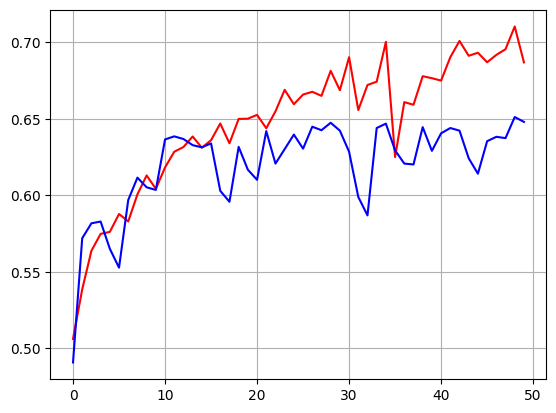

In [18]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

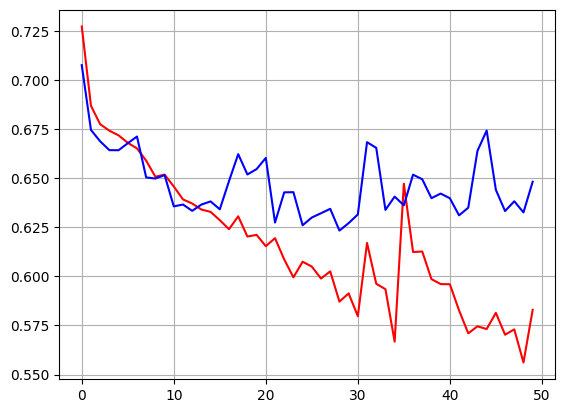

In [19]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()